In [37]:
import pandas as pd
import datetime
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
data=pd.read_csv("../Part_2/energydata_complete.csv")

In [39]:
data.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [40]:
analysed_data=pd.read_csv("../Part_2/Data_analysed.csv")

In [41]:
analysed_data.head()

,Unnamed: 0,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,month_mean_RH1,month_mean_RH2,month_mean_RH3,month_mean_RH4,month_mean_RH5,month_mean_RH6,month_mean_RH7,month_mean_RH8,month_mean_RH9,month_mean_RHo
0,0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461
1,1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461
2,2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461
3,3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461
4,4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461


In [42]:
analysed_data.dtypes

Unnamed: 0          int64
date               object
Appliances          int64
lights              int64
T1                float64
RH_1              float64
T2                float64
RH_2              float64
T3                float64
RH_3              float64
T4                float64
RH_4              float64
T5                float64
RH_5              float64
T6                float64
RH_6              float64
T7                float64
RH_7              float64
T8                float64
RH_8              float64
T9                float64
RH_9              float64
T_out             float64
Press_mm_hg       float64
RH_out            float64
Windspeed         float64
Visibility        float64
Tdewpoint         float64
rv1               float64
rv2               float64
month               int64
year                int64
day                 int64
day_of_week        object
time_hr_24          int64
day_slot           object
week               object
week_day_type      object
month_name  

In [43]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [44]:
# Spliting data and normalization

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
weekend = ['Saturday','Sunday']
def week_day_type(x):
    if x in weekend:
        return 'weekends'
    else:
        return 'weekdays'
def time_slot(x):
    if x in morning:
        return 'morning'
    elif x in afternoon:
        return 'afternoon'
    elif x in evening:
        return 'evening'
    else:
        return 'night' 

In [46]:
data['date']=pd.to_datetime(data['date'])
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day
data['day_of_week']=data['date'].dt.weekday_name
data['time_hr_24']=data['date'].dt.hour
data['time_min']=data['date'].dt.minute
data['week_day_type']=data['day_of_week'].map(week_day_type)
morning=range(6,12)
afternoon=range(12,17)
evening=range(17,22)  
data['time_slot']=data['time_hr_24'].map(time_slot)
data.drop(['date'],axis=1,inplace=True)
data=pd.get_dummies(data,prefix=['DOW','TS','WDT'],columns=['day_of_week','time_slot','week_day_type'])
print(data.shape)

(19735, 46)


In [47]:

df_train,df_test = train_test_split(data,train_size=0.7,random_state=42)
x_train=df_train.iloc[:,1:]
y_train=df_train['Appliances']
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
x_test=df_test.iloc[:,1:]
y_test=df_test['Appliances']
x_test_sc=scaler.transform(x_test)

Linear Regression Model

In [48]:

lm=linear_model.LinearRegression()
mod=lm.fit(x_train_sc,y_train)
print(mod.coef_)

print(x_train.columns)

[ 1.27311327e+01 -3.55718214e+00  4.82855496e+01 -3.86638652e+01
 -4.99836910e+01  5.07160517e+01  2.27692226e+01  3.82525914e+00
 -6.79021158e+00 -2.61521677e+00  3.43333957e-01  2.88166878e+01
 -7.34441736e-01  2.44386866e+00 -6.96897198e+00  1.82222358e+01
 -1.37056743e+01 -2.69899999e+01 -4.90771902e+00 -4.09994697e+01
  1.17023936e+00 -6.85337123e+00  3.74400084e+00  2.32604519e+00
  1.85177640e+01  4.09382986e-01  4.09382986e-01 -3.90798505e-14
 -1.17913554e+01 -1.42626392e+00 -1.17279793e+00  1.77942571e+00
  5.20350987e+00  1.13050837e+00  3.87232266e+00 -2.38662247e+00
 -2.52393895e+00 -3.63926792e+00 -1.56566165e+00  1.38663924e+00
  1.01841853e+01  5.50861544e+00 -1.50336310e+01 -1.12071555e+00
  1.12071555e+00]
Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'year', 'month'

In [49]:
rf=RandomForestRegressor()
rf.fit(x_train_sc, y_train)
feature_list = list(x_train.columns)
importances = list(rf.feature_importances_)
feature_importances = [(x_train, round(importance, 2)) for x_train, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:28} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TS_night                     Importance: 0.09
Variable: T3                           Importance: 0.05
Variable: time_hr_24                   Importance: 0.05
Variable: lights                       Importance: 0.04
Variable: RH_3                         Importance: 0.04
Variable: RH_5                         Importance: 0.04
Variable: T8                           Importance: 0.04
Variable: Press_mm_hg                  Importance: 0.04
Variable: RH_1                         Importance: 0.03
Variable: T2                           Importance: 0.03
Variable: RH_2                         Importance: 0.03
Variable: T4                           Importance: 0.03
Variable: RH_4                         Importance: 0.03
Variable: T7                           Importance: 0.03
Variable: RH_7                         Importance: 0.03
Variable: RH_8                         Importance: 0.03
Variable: RH_9                         Importance: 0.03
Variable: RH_out                       Importanc

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
d = pd.DataFrame(feature_importances)

In [79]:
d.columns = ['Feature', 'Value']

In [80]:
d

,Feature,Value
0,TS_night,0.09
1,T3,0.05
2,time_hr_24,0.05
3,lights,0.04
4,RH_3,0.04
5,RH_5,0.04
6,T8,0.04
7,Press_mm_hg,0.04
8,RH_1,0.03
9,T2,0.03


No handles with labels found to put in legend.


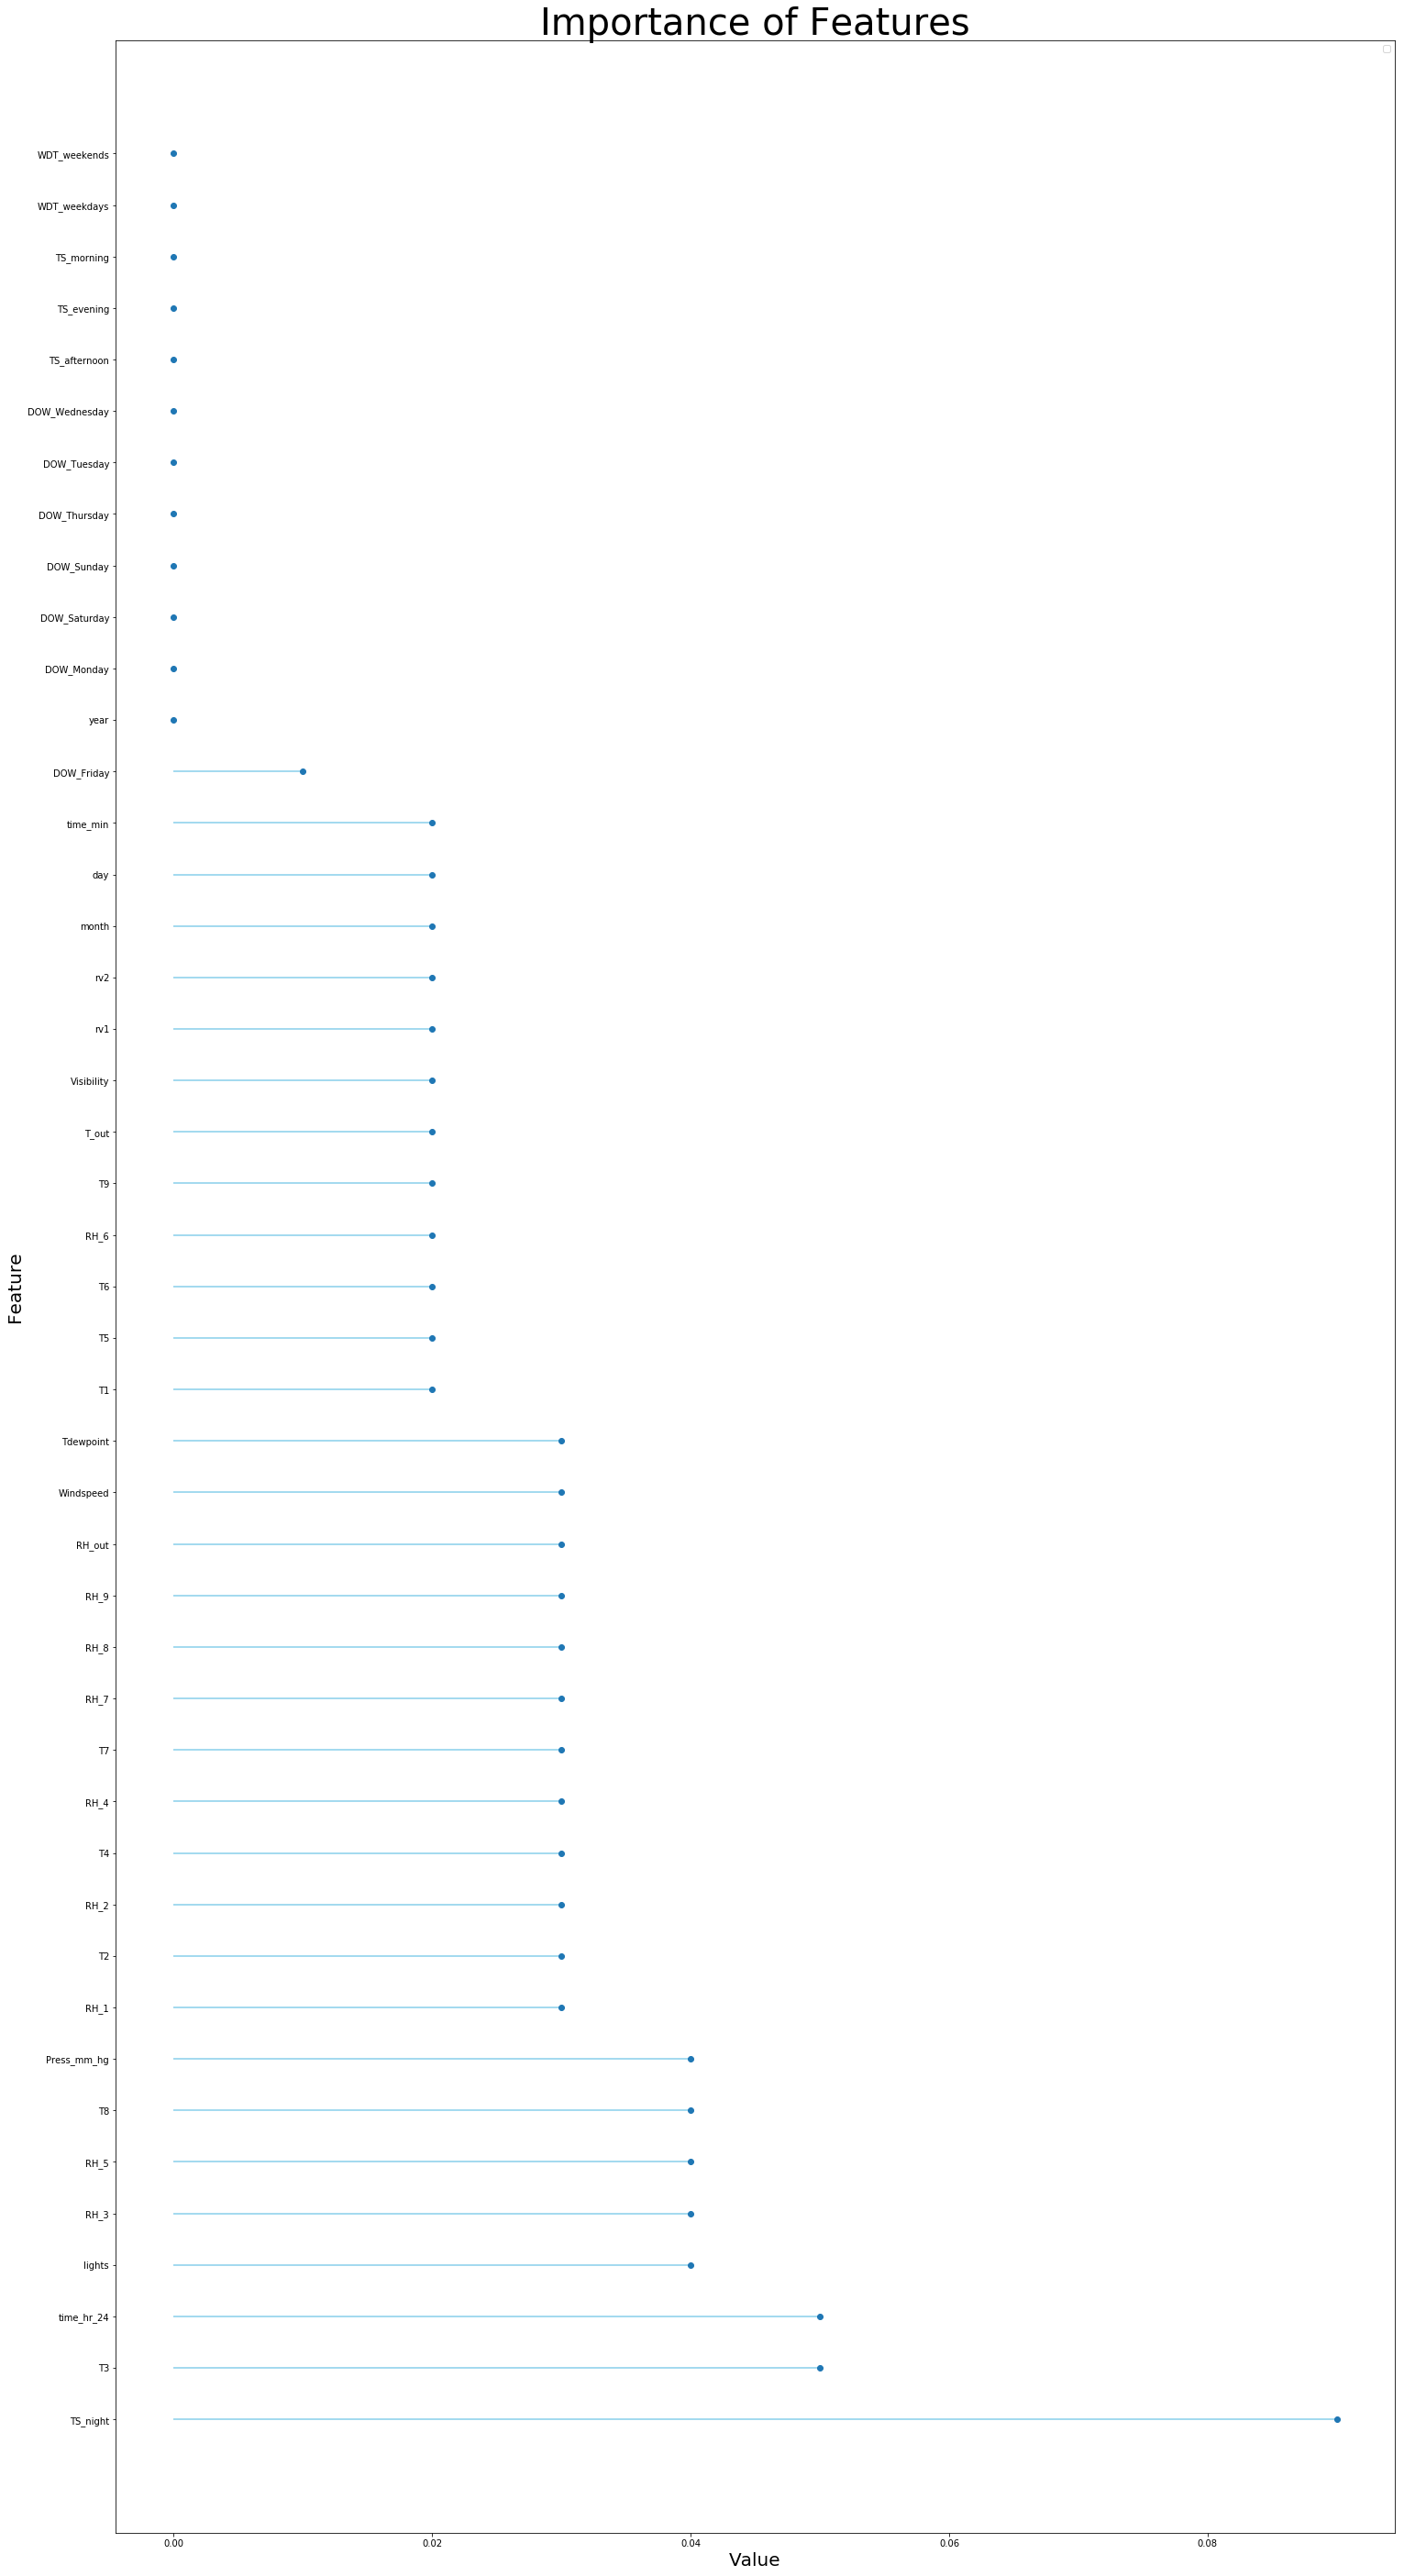

In [89]:
a=d['Feature']
plt.xlabel("Value" , fontsize=20)
plt.ylabel("Feature" , fontsize=20)
plt.legend()
plt.title("Importance of Features" , fontsize=40)
plt.hlines(y=a, xmin=0, xmax=d['Value'], color='skyblue')
plt.plot(d['Value'], a, "o")
plt.rcParams['figure.figsize'] = (25 , 50)
plt.show()